In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df=pd.read_csv('/content/Credit card transactions.csv')
# Explore the first few rows of the dataset
print(df.head())

   index                   City       Date  Card Type Exp Type Gender  Amount
0      0           Delhi, India  29-Oct-14       Gold    Bills      F   82475
1      1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555
2      2       Bengaluru, India  27-Aug-14     Silver    Bills      F  101738
3      3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424
4      4       Bengaluru, India   5-May-15       Gold    Bills      F  171574


In [6]:
# Check basic statistics of the dataset
print(df.describe())

              index         Amount
count  26052.000000   26052.000000
mean   13025.500000  156411.537425
std     7520.708943  103063.254287
min        0.000000    1005.000000
25%     6512.750000   77120.250000
50%    13025.500000  153106.500000
75%    19538.250000  228050.000000
max    26051.000000  998077.000000


In [7]:
df.shape

(26052, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [9]:
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [10]:
df.isnull()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
26047,False,False,False,False,False,False,False
26048,False,False,False,False,False,False,False
26049,False,False,False,False,False,False,False
26050,False,False,False,False,False,False,False


In [11]:
df.isnull().any()

,0
index,False
City,False
Date,False
Card Type,False
Exp Type,False
Gender,False
Amount,False


In [12]:
df.isnull().sum()

,0
index,0
City,0
Date,0
Card Type,0
Exp Type,0
Gender,0
Amount,0


In [13]:
df.set_index('index', inplace = True)
df

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019


In [17]:
df['Gender'] = df['Gender'].replace('F', 'Female')
df['Gender'] = df['Gender'].replace('M', 'Male')
df

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,Female,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,Female,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,Female,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,Female,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,Female,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,Female,128191
26048,"Pune, India",2014-08-03,Signature,Travel,Male,246316
26049,"Hyderabad, India",2015-01-16,Silver,Travel,Male,265019


In [18]:
# Grouping by 'Card Type' and calculating the mean amount spent for each card type
card_type = df.groupby('Card Type')['Amount'].mean()
print("Mean Amount Spent by Card Type:")
print(card_type)


# Grouping by 'Exp Type' and calculating the total amount spent in each expense category
expense_type = df.groupby('Exp Type')['Amount'].sum()
print("\nTotal Amount Spent by Expense Type:")
print(expense_type)


# Grouping by 'Gender' and calculating the total amount spent by each gender
gender = df.groupby('Gender')['Amount'].sum()
print("\nTotal Amount Spent by Gender:")
print(gender)


# Grouping by 'City' and calculating the total amount spent in each city
city = df.groupby('City')['Amount'].sum()
print("\nTotal Amount Spent in each City:")
print(city)


# Grouping by 'City' and 'Card Type' and calculating the mean amount spent for each combination
city_card = df.groupby(['City', 'Card Type'])['Amount'].mean()
print("\nMean Amount Spent by City and Card Type:")
print(city_card)

Mean Amount Spent by Card Type:
Card Type
Gold         154631.621800
Platinum     157492.813223
Signature    157133.721886
Silver       156376.273830
Name: Amount, dtype: float64

Total Amount Spent by Expense Type:
Exp Type
Bills            907072473
Entertainment    726437536
Food             824724009
Fuel             789135821
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64

Total Amount Spent by Gender:
Gender
Female    2205311030
Male      1869522343
Name: Amount, dtype: int64

Total Amount Spent in each City:
City
Achalpur, India     1606641
Adilabad, India     1769464
Adityapur, India     963993
Adoni, India        1575355
Adoor, India         647725
                     ...   
Zaidpur, India       723818
Zamania, India       865634
Zira, India         1640547
Zirakpur, India      549663
Zunheboto, India     466429
Name: Amount, Length: 986, dtype: int64

Mean Amount Spent by City and Card Type:
City              Card Type
Achalpur, India   Gold

In [19]:
# mean of transactions depends on Card Type
c_type = df.groupby(df['Card Type']).mean(numeric_only=True)
c_type = c_type.sort_values(by = 'Amount')
c_type

,Amount
Card Type,
Gold,154631.621800
Silver,156376.273830
Signature,157133.721886
Platinum,157492.813223


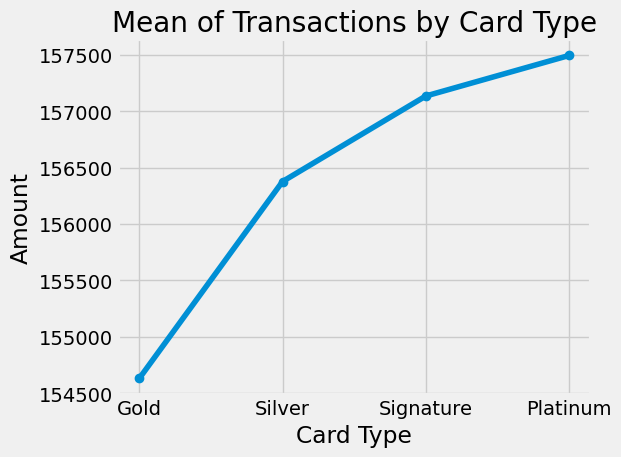

In [20]:
# line plot for mean of transactions depends on Card Type

plt.style.use('fivethirtyeight')

plt.plot(c_type.index, c_type, marker = 'o')

plt.xlabel('Card Type')
plt.ylabel('Amount')
plt.title('Mean of Transactions by Card Type')
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()

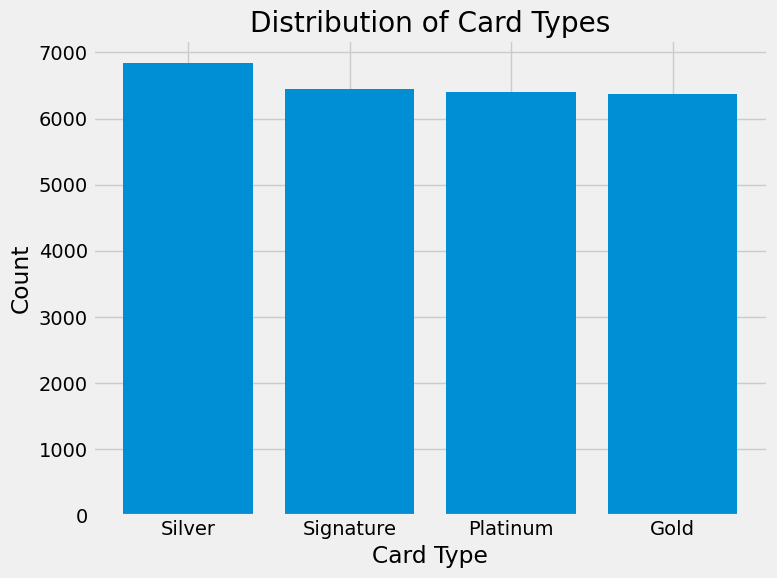

In [21]:
# bar chart for card types number of occurrences

# Count the occurrences of each card type
card_type_counts = df['Card Type'].value_counts()


plt.figure(figsize=(8, 6))
plt.bar(card_type_counts.index, card_type_counts.values)
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Distribution of Card Types')
plt.tight_layout()
plt.show()

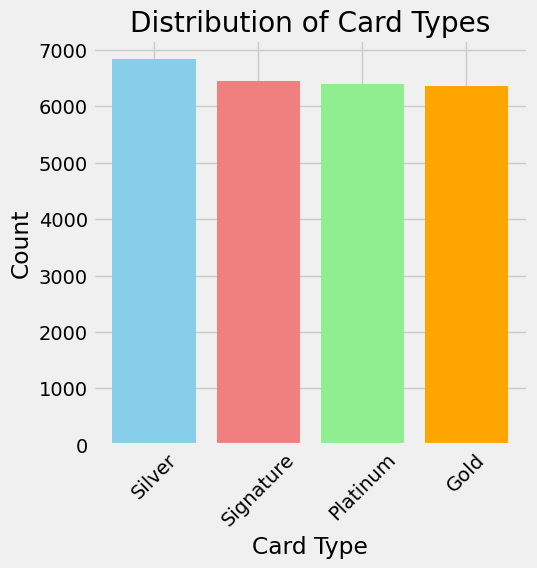

In [22]:
# bar chart for card types number of occurrences

# Count the occurrences of each card type
card_type_counts = df['Card Type'].value_counts()

# Define colors for each bar
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink']

plt.figure(figsize=(5,5))
plt.bar(card_type_counts.index, card_type_counts.values, color=colors)
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Distribution of Card Types')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

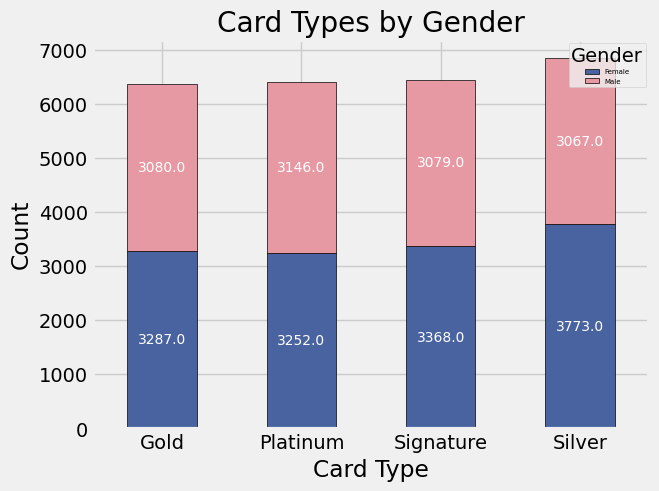

In [23]:
# Plot Stacked Bar Chart of Card Types by Gender

# Cross-tabulate Card Type and Gender
ct = pd.crosstab(df['Card Type'], df['Gender'])

plt.figure(figsize=(8,6))
colors=['#4863A0'	, '#E799A3']
ax = ct.plot(kind='bar', stacked=True, edgecolor='k', color=colors)

# Add the count values on top of each segment of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(i.get_height()),
            fontsize=10, color='white', ha='center', va='center')

plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Card Types by Gender')
plt.legend(title='Gender', loc='upper right', prop={'size':5})
plt.xticks(rotation=0)
plt.show()

Total Amount Spent by Gender:
Gender
Female    2205311030
Male      1869522343
Name: Amount, dtype: int64


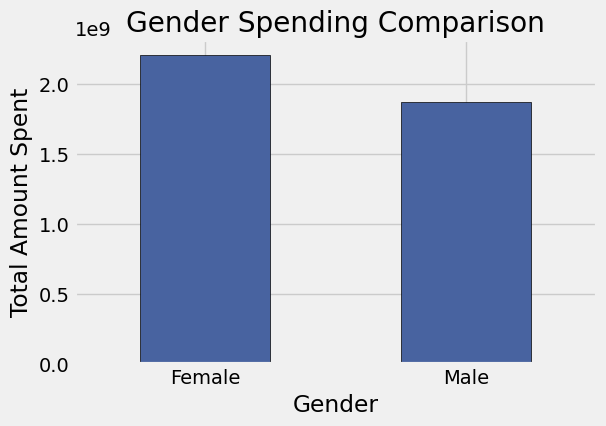

In [24]:
grouped_by_gender = df.groupby('Gender')['Amount'].sum()

# Displaying the total amount spent by each gender
print("Total Amount Spent by Gender:")
print(grouped_by_gender)

# Plotting the gender spending comparison as a bar plot
plt.figure(figsize=(6, 4))
grouped_by_gender.plot(kind='bar', edgecolor='k', color ='#4863A0')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Gender Spending Comparison')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

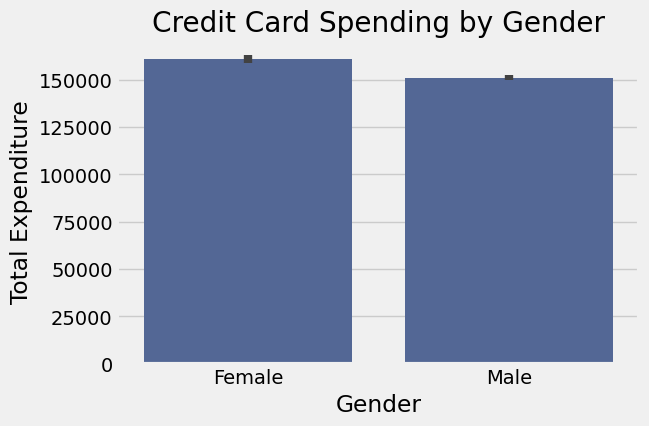

In [25]:
#GENDER BASED ANALYSIS
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Amount', data=df, color ='#4863A0')
plt.title('Credit Card Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Expenditure')
plt.show()

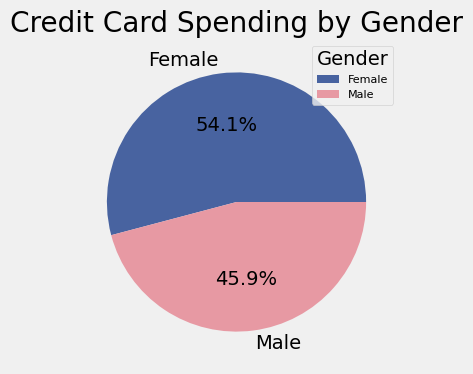

In [26]:
# Explore spending by gender in a pie chart
plt.figure(figsize=(6,4))
gender_spending = df.groupby('Gender')['Amount'].sum()
plt.pie(gender_spending, labels=gender_spending.index, autopct='%1.1f%%', colors=['#4863A0','#E799A3'])
plt.title('Credit Card Spending by Gender')
plt.legend(title='Gender', loc='upper right', prop={'size':8})
plt.show()

In [27]:
# mean of transactions depends on Exp Type
exp_type = df.groupby('Exp Type')['Amount'].mean()
exp_type.sort_values()
exp_type

,Amount
Exp Type,
Bills,178627.899370
Entertainment,152548.831583
Food,150965.405272
Fuel,150111.436371
Grocery,151074.447413
Travel,148042.833333


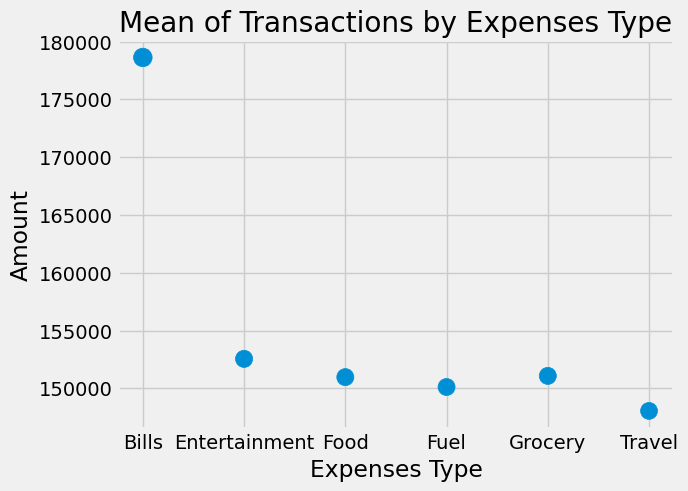

In [29]:
# scatter plot for mean of transactions depends on expensies Type

plt.style.use('fivethirtyeight')

plt.scatter(exp_type.index, exp_type, marker = 'o', s = exp_type/1000)

plt.xlabel('Expenses Type')
plt.ylabel('Amount')
plt.title('Mean of Transactions by Expenses Type')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability if needed
plt.show()

Top Spending Categories:
Exp Type
Bills            907072473
Food             824724009
Fuel             789135821
Entertainment    726437536
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64


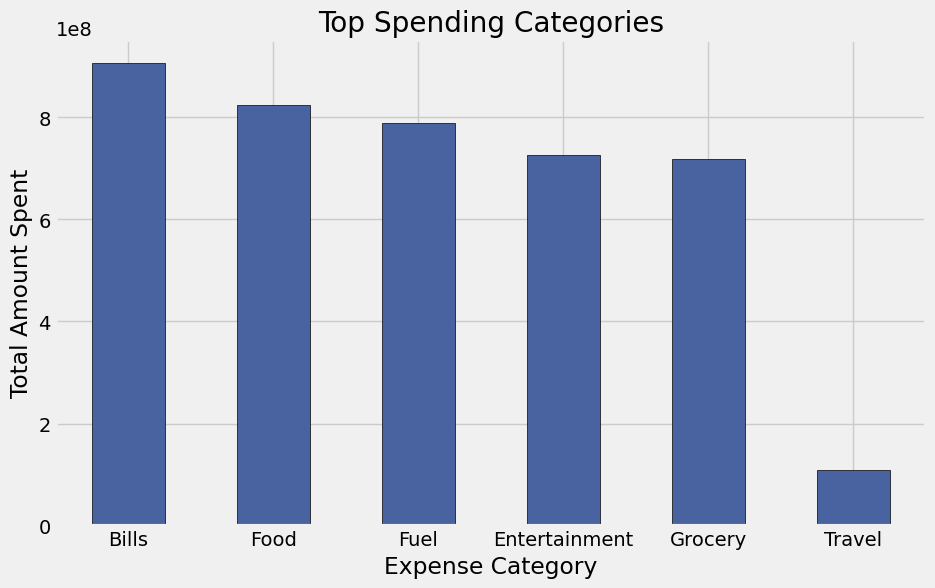

In [30]:
# bar plot for top spending Expense Category

grouped_by_expense_type = df.groupby('Exp Type')['Amount'].sum()
top_spending_categories = grouped_by_expense_type.sort_values(ascending=False)

# Displaying the top spending categories
print("Top Spending Categories:")
print(top_spending_categories)
# Plotting the top spending categories as a bar plot
plt.figure(figsize=(10, 6))
top_spending_categories.plot(kind='bar', edgecolor='k', color='#4863A0')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount Spent')
plt.title('Top Spending Categories')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

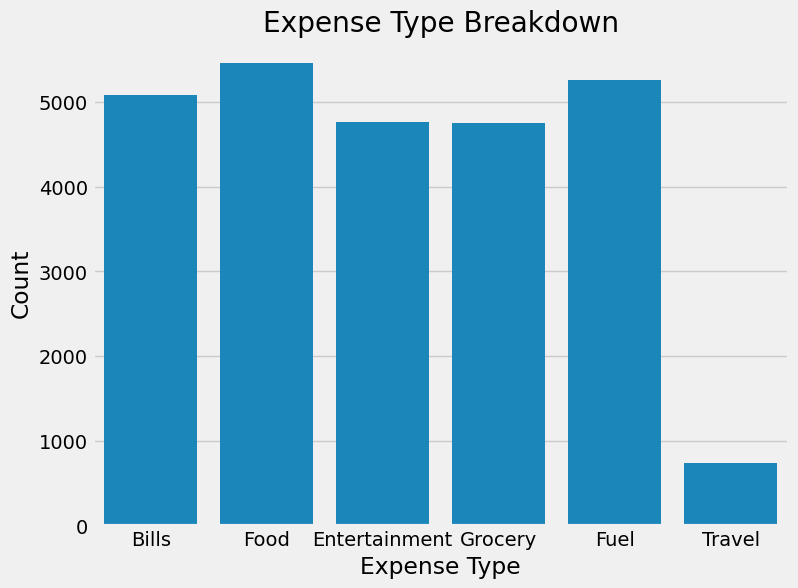

In [31]:
#EXPENSE TYPE BREAKDOWN
plt.figure(figsize=(8,6))
sns.countplot(x='Exp Type', data=df)
plt.title('Expense Type Breakdown')
plt.xlabel('Expense Type')
plt.ylabel('Count')
plt.show()

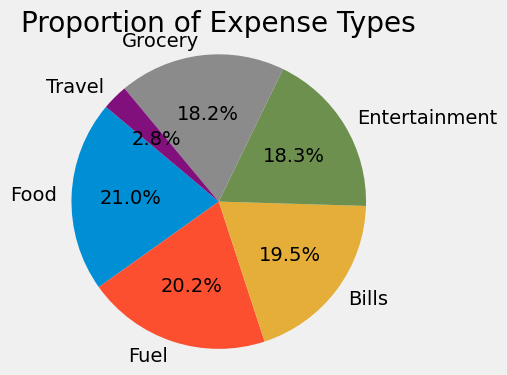

In [32]:
# pie chart for card types ( percent of occurrences )

# Count the occurrences of each expense type
expense_type_counts = df['Exp Type'].value_counts()


plt.figure(figsize=(4,4))
plt.pie(expense_type_counts.values, labels=expense_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Expense Types')
plt.show()

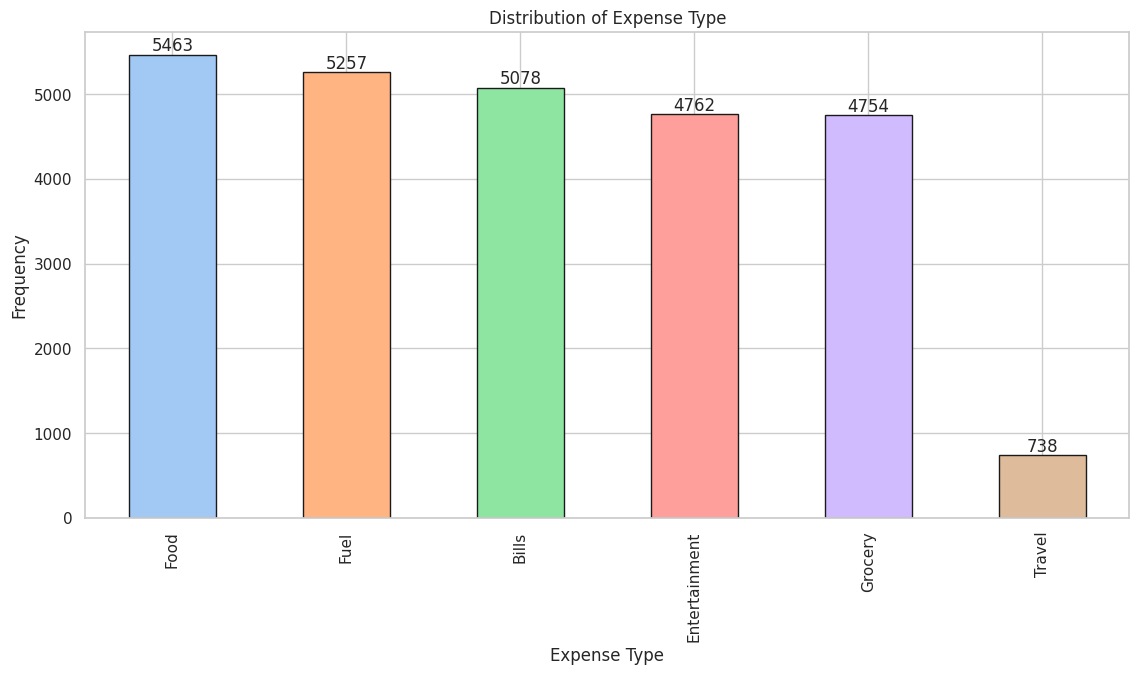

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Bar plot for Expense Type (Exp Type)
plt.figure(figsize=(12, 6))
expense_type_counts = df['Exp Type'].value_counts()
colors_expense_type = sns.color_palette("pastel", len(expense_type_counts))  # Use seaborn color palette

expense_type_counts.plot(kind='bar', color=colors_expense_type, edgecolor='k')

# Add the values on top of each bar
for index, value in enumerate(expense_type_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Expense Type')
plt.ylabel('Frequency')
plt.title('Distribution of Expense Type')
plt.show()

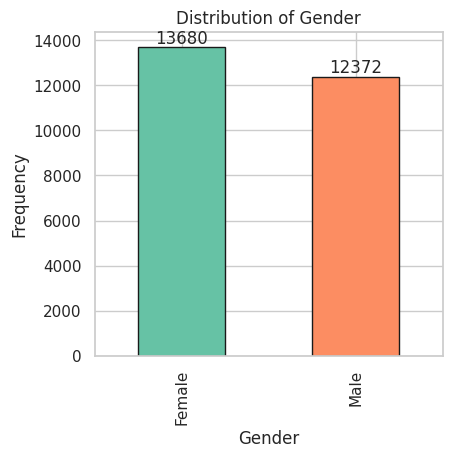

In [34]:
# Bar plot for Gender
plt.figure(figsize=(4,4))
gender_counts = df['Gender'].value_counts()
colors_gender = sns.color_palette("Set2")  # Use seaborn color palette

gender_counts.plot(kind='bar', color=colors_gender, edgecolor='k')

# Add the values on top of each bar
for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

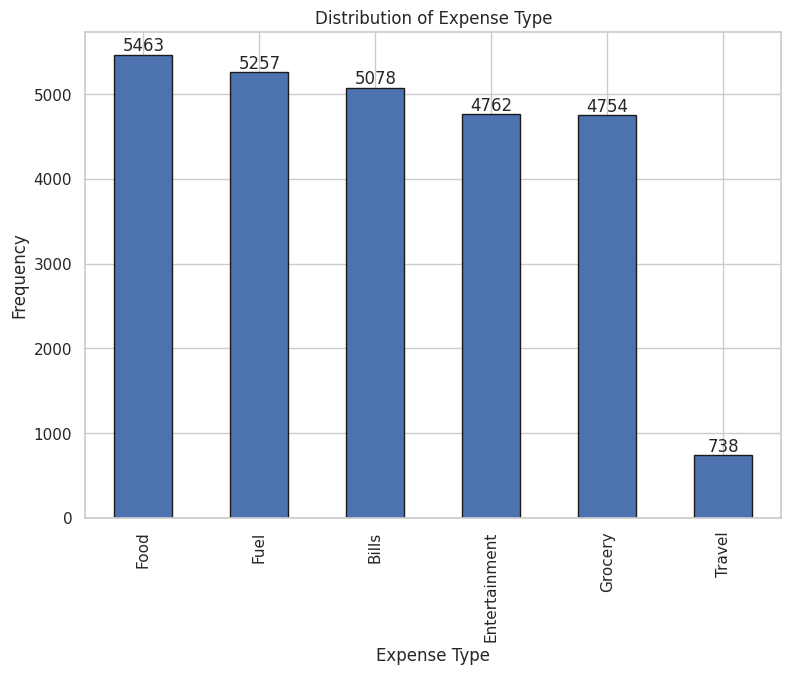

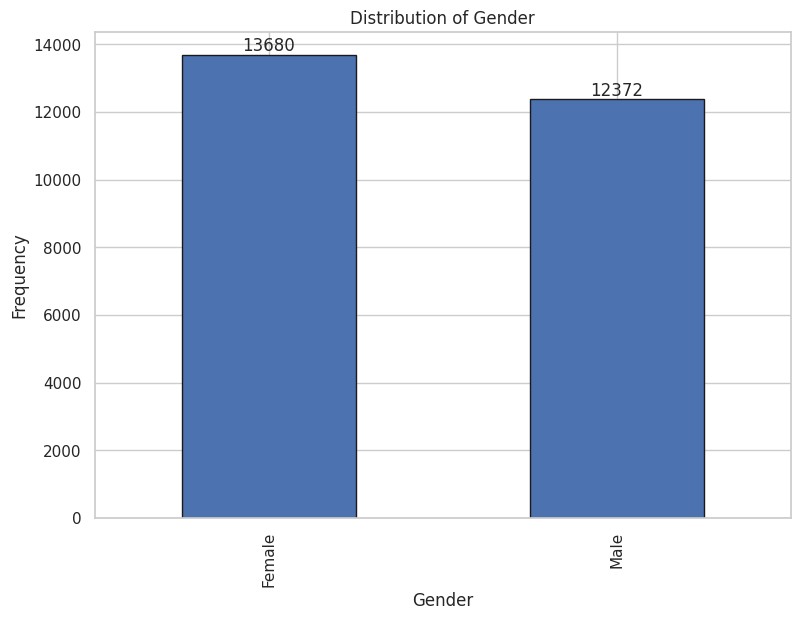

In [35]:
# Bar plot for Expense Type (Exp Type)
plt.figure(figsize=(8, 6))
expense_type_counts = df['Exp Type'].value_counts()
expense_type_counts.plot(kind='bar', edgecolor='k')

# Add the values on top of each bar
for index, value in enumerate(expense_type_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Expense Type')
plt.ylabel('Frequency')
plt.title('Distribution of Expense Type')
plt.show()


# Bar plot for Gender
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', edgecolor='k')

# Add the values on top of each bar
for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

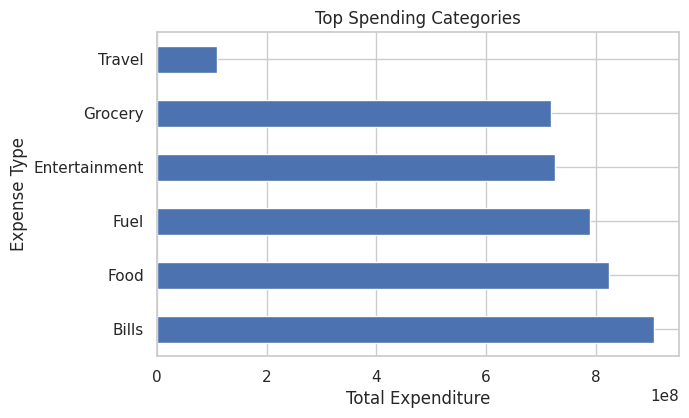

In [36]:
top_expense_categories = df.groupby('Exp Type')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,4))
top_expense_categories.plot(kind='barh')
plt.title('Top Spending Categories')
plt.xlabel('Total Expenditure')
plt.ylabel('Expense Type')
plt.show()

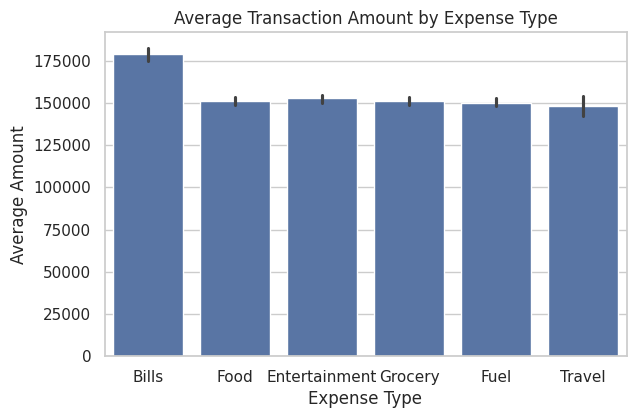

In [37]:
# Average Transaction Amount by Expense Type
plt.figure(figsize=(6,4))
sns.barplot(x='Exp Type', y='Amount', data=df, estimator='mean')
plt.title('Average Transaction Amount by Expense Type')
plt.xlabel('Expense Type')
plt.ylabel('Average Amount')
plt.show()

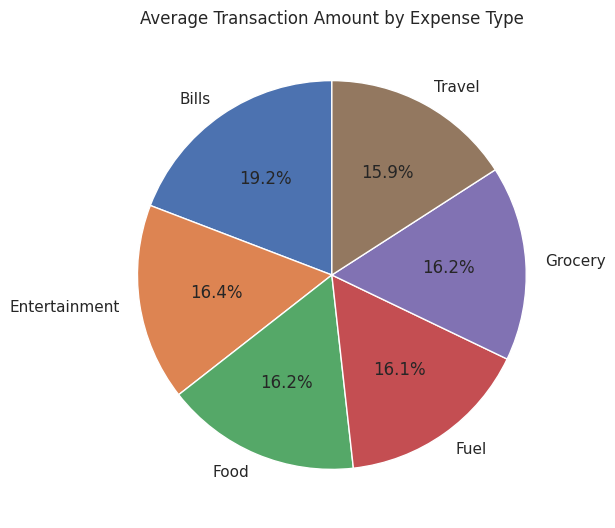

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the credit card spending data

# Calculate average transaction amount for each expense type
average_amount_by_expense_type = df.groupby('Exp Type')['Amount'].mean()

# Plot average transaction amount by expense type as a pie chart
plt.figure(figsize=(6,6))
plt.pie(average_amount_by_expense_type, labels=average_amount_by_expense_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Transaction Amount by Expense Type')
plt.show()

In [39]:
# Heighest and lowest 10 cities in transctions by mean

high_city= df.groupby('City')['Amount'].mean().sort_values(ascending = False).head(10)
h_size = high_city
high_city

low_city= df.groupby('City')['Amount'].mean().sort_values().head(10)
l_size = low_city
low_city

,Amount
City,
"Bahraich, India",12126.500000
"Fazilka, India",14949.000000
"Mahbubnagar, India",15458.000000
"Tirur, India",26094.000000
"Thiruvalla, India",27841.333333
"Changanassery, India",30074.000000
"Solapur, India",43244.000000
"Attingal, India",46810.000000
"Nalbari, India",47660.500000


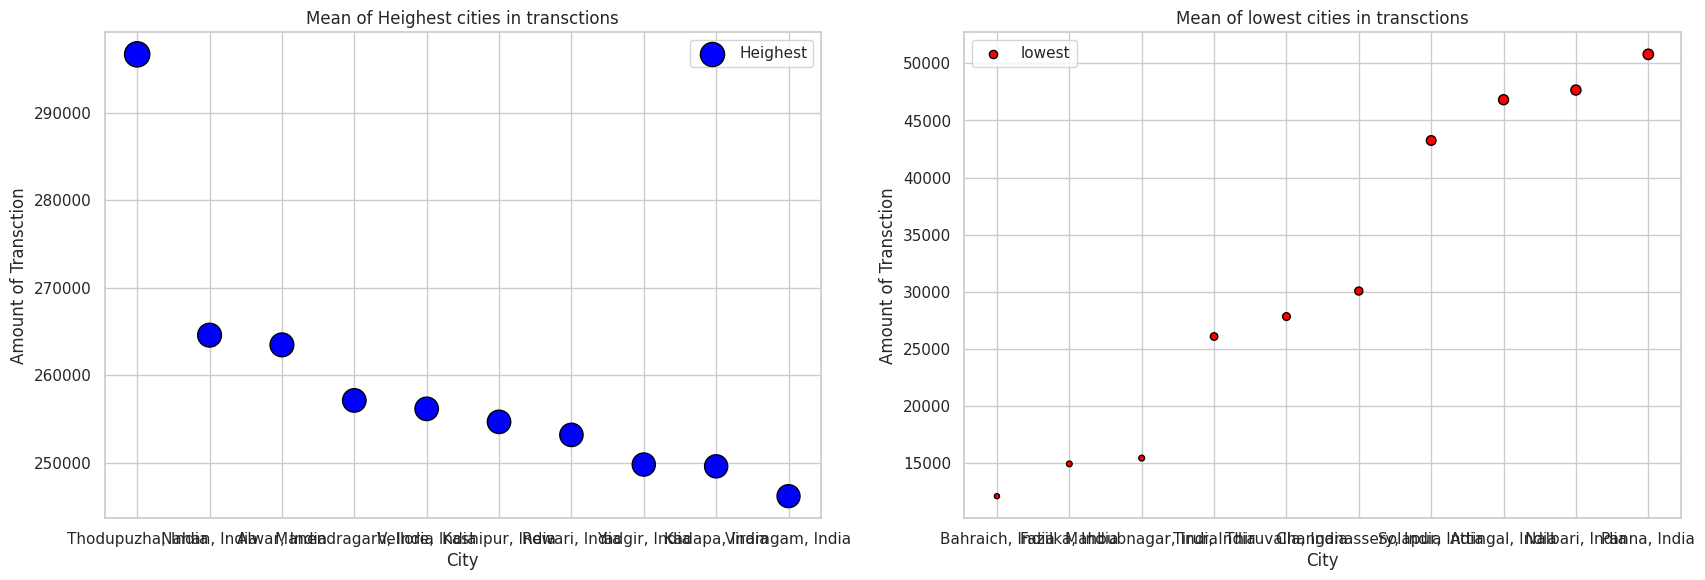

In [40]:
plt.figure(figsize= (28,6))


plt.subplot(131)
plt.scatter(high_city.index, high_city, label = 'Heighest' , s = h_size/900, c = 'blue', edgecolors = 'black')
plt.xlabel("City")
plt.ylabel("Amount of Transction")
plt.title('Mean of Heighest cities in transctions')
plt.legend(loc='upper right')


plt.subplot(132)
plt.scatter(low_city.index, low_city, label = 'lowest' , s = l_size/900, c = 'red', edgecolors = 'black')
plt.xlabel("City")
plt.ylabel("Amount of Transction")
plt.title('Mean of lowest cities in transctions')
plt.legend(loc='upper left')


# plt.rcParams['figure.figsize'] = ()

plt.show()

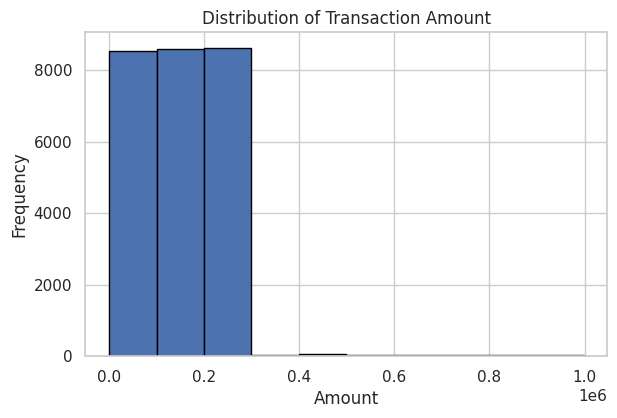

In [41]:
# Plot the histogram Distribution of Transaction Amount
plt.figure(figsize=(6,4))
n_bins = 10
plt.hist(df['Amount'], bins=n_bins, edgecolor='black')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()

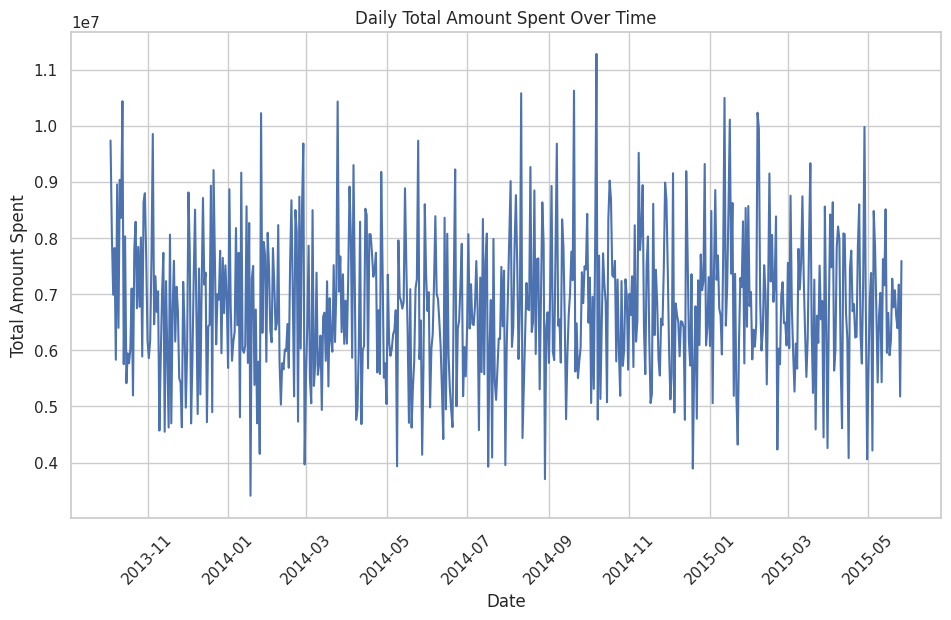

In [42]:
# line chart for total amount spent each Day

daily_spending = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(10,6))
plt.plot(daily_spending.index, daily_spending.values)
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.title('Daily Total Amount Spent Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

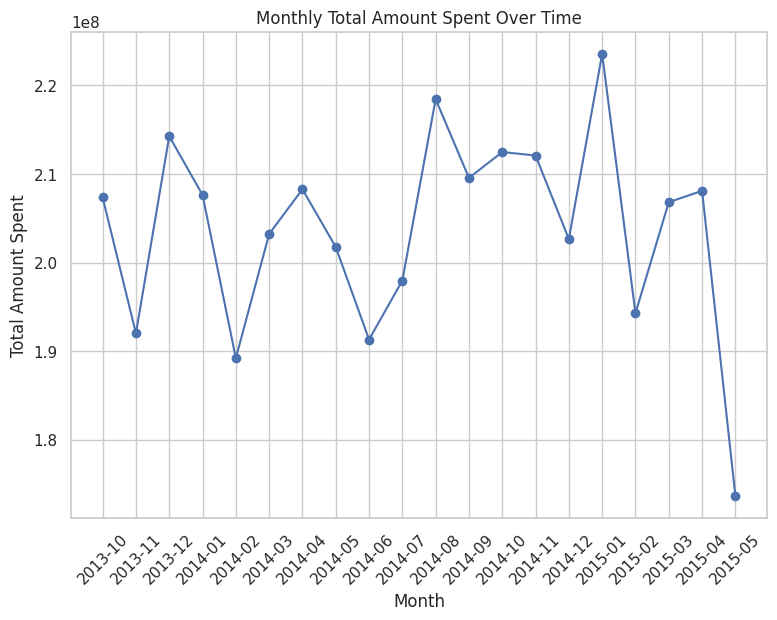

In [43]:
# line chart for total amount spent each Month
monthly_spending = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Convert the PeriodIndex to string format for plotting
monthly_spending.index = monthly_spending.index.astype(str)

plt.figure(figsize=(8, 6))
plt.plot(monthly_spending.index, monthly_spending.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.title('Monthly Total Amount Spent Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

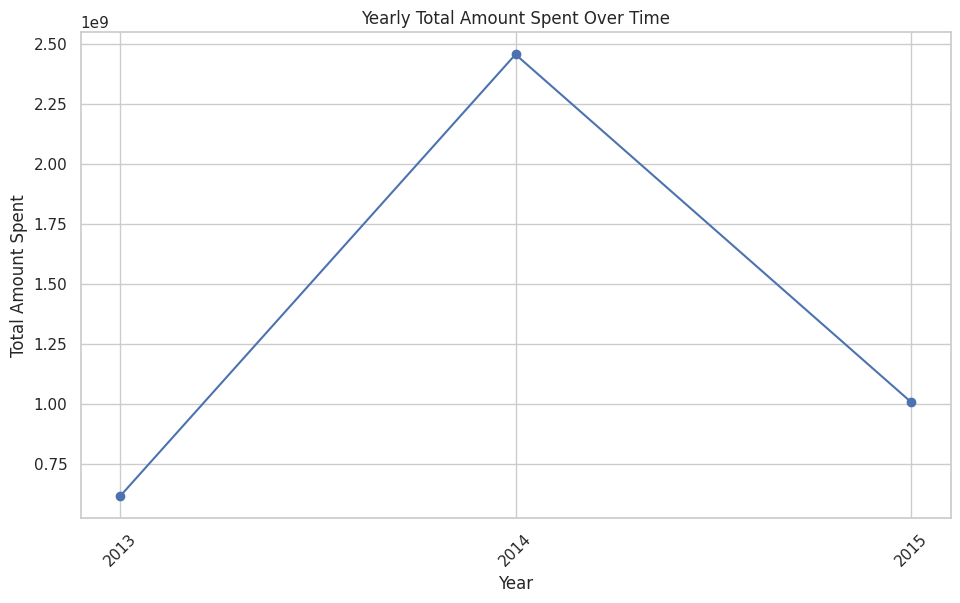

In [44]:
# line chart for total amount spent each year

yearly_spending = df.groupby(df['Date'].dt.year)['Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_spending.index, yearly_spending.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.title('Yearly Total Amount Spent Over Time')
plt.xticks(yearly_spending.index, rotation=45)
plt.grid(True)
plt.show()

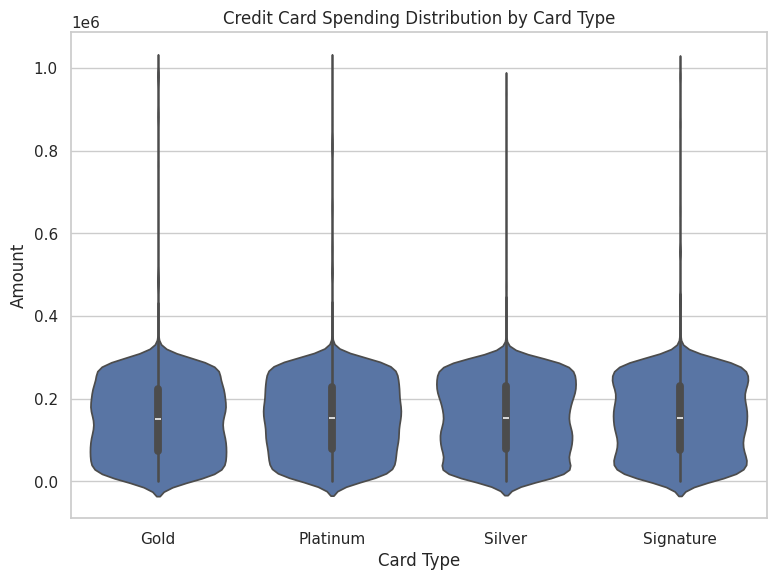

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the credit card spending data

# Plot violin plots for each card type
plt.figure(figsize=(8,6))
sns.violinplot(x='Card Type', y='Amount', data=df)
plt.title('Credit Card Spending Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Amount')
plt.show()

Text(0.5, 1.0, 'Card Type Distribution')

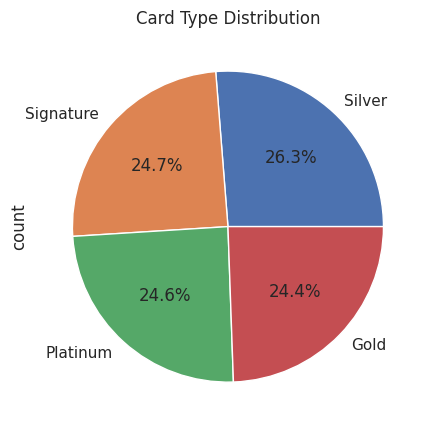

In [46]:
# Plot : Pie chart of Card Type distribution
plt.subplot(1,1,1)
card_type_count = df['Card Type'].value_counts()
card_type_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Card Type Distribution')

Text(0.5, 1.0, 'Date vs. Amount')

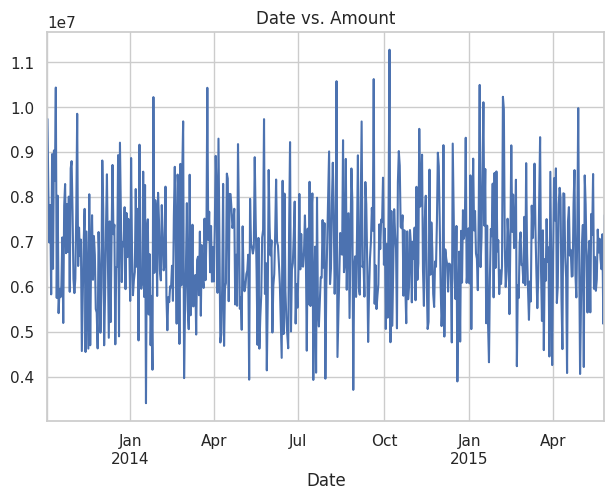

In [47]:
# Plot : Line plot of Date vs. Amount
plt.subplot(1,1,1)
df['Date'] = pd.to_datetime(df['Date'])
date_amount = df.groupby('Date')['Amount'].sum()
date_amount.plot(kind='line')
plt.title('Date vs. Amount')

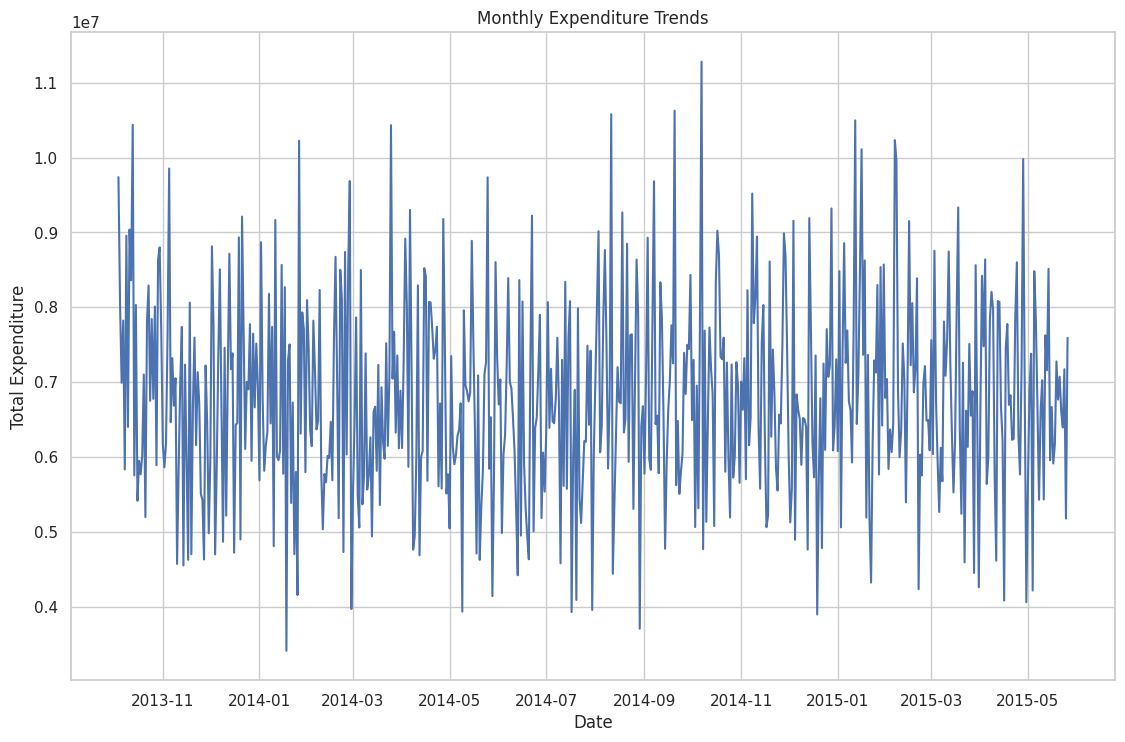

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the credit card spending data

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month and year from the date
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Plot monthly expenditure trends
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Amount', data=df, estimator='sum', errorbar=None)
plt.title('Monthly Expenditure Trends')
plt.xlabel('Date')
plt.ylabel('Total Expenditure')
plt.show()


In [56]:
import pandas as pd
import plotly.graph_objects as go
# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/Credit card transactions.csv'
df = pd.read_csv(file_path)

# Calculate total expenses (you can use your own metric here)
total_expenses = df['Amount'].sum()

# Create a gauge chart
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number+gauge",
    value=total_expenses,
    domain={'x': [0, 1], 'y': [0, 1]},
    title={'text': "Total Expenses"},
    gauge={
        'axis': {'range': [None, total_expenses]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, total_expenses/3], 'color': "red"},
            {'range': [total_expenses/3, 2*total_expenses/3], 'color': "orange"},
            {'range': [2*total_expenses/3, total_expenses], 'color': "green"}
        ],
    }
))

fig.show()